In [77]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
import datetime as dt
%matplotlib inline
cf.go_offline()

# Establish start and end dates
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

# Bank of America Stock Information
BOA = data.DataReader("BAC", "yahoo", start, end)

# CitiGroup
citi = data.DataReader("C", "yahoo", start, end)

# Goldman Sachs
gold = data.DataReader("GS", "yahoo", start, end)

# JPMorgan Chase
jpm = data.DataReader("JPM", "yahoo", start, end)

# Morgan Stanley
ms = data.DataReader("MS", "yahoo", start, end)

# Wells Fargo
fargo = data.DataReader("WFC", "yahoo", start, end)

# Establish Ticker Symbols and Column Names
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]
col_names = ["Bank Ticker", "Stock Info"]

# Concat all into single dataframe with ticker symbols as keys
stocks = pd.concat([BOA, citi, gold, jpm, ms, fargo], axis=1, keys=tickers, names=col_names)
stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777519  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418774  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461823  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411602  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433121  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558960  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583351  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680916  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717514  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095604  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242823  
2006-01-04   31.799999  31.530001  10870000.0  20.008028  
2006-01-05   31.500000  31.495001  10158000.0  19.985823  
2006-01-06   31.580000  31.680000   8403800.0  20.103214  
2006-01-09   31.674999  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

In [18]:
# Max Close Price of Each
stocks.xs(level="Stock Info", key="Close", axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [23]:
# Get Daily Returns for Each and Store in New DataFrame
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker + ' Return'] = stocks[ticker]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


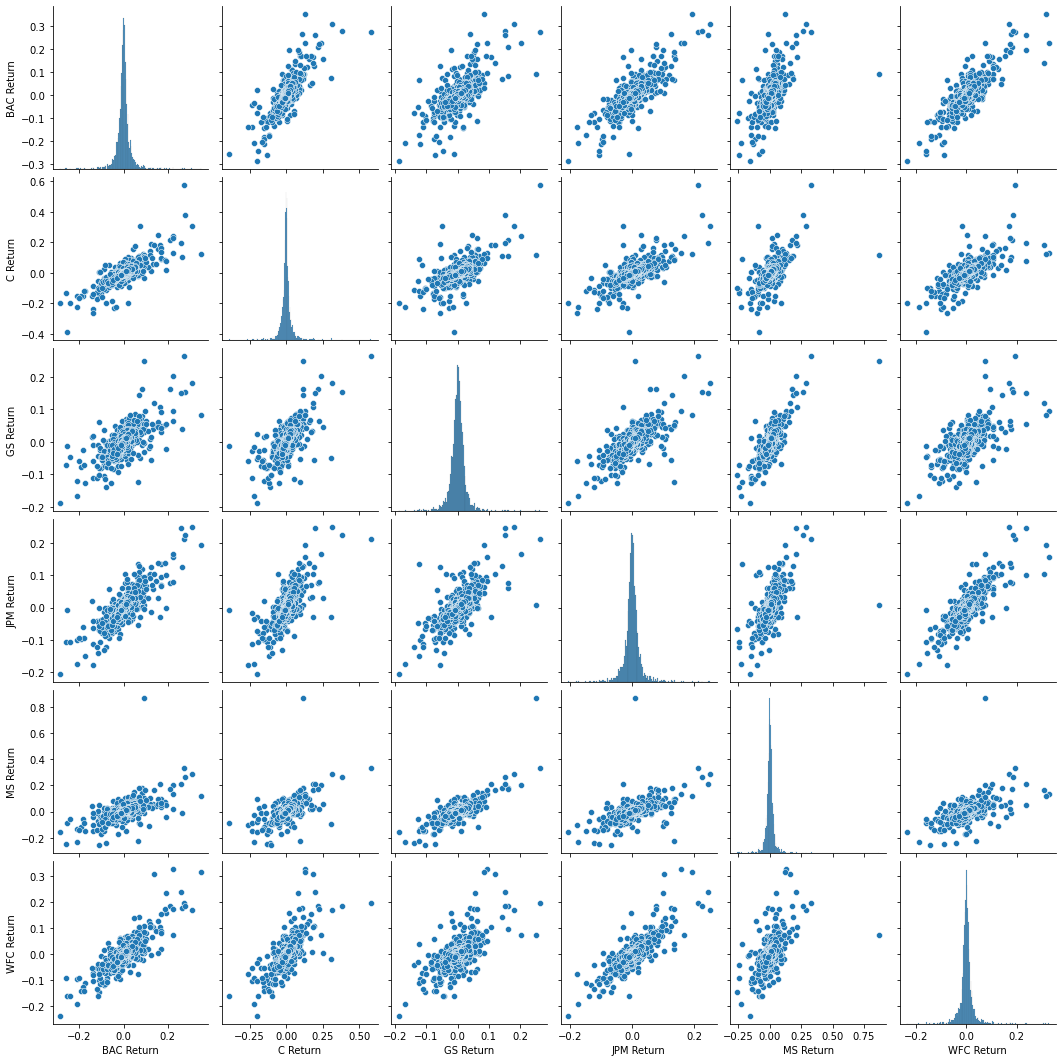

In [26]:
sb.pairplot(data=returns[1:])

In [29]:
# Biggest Drops for Each - Largely Coincides with Obama Inauguration
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [30]:
# Biggest Gains for Each
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [31]:
# Standard Deviation to Determine Risk
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [39]:
# Risk over 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

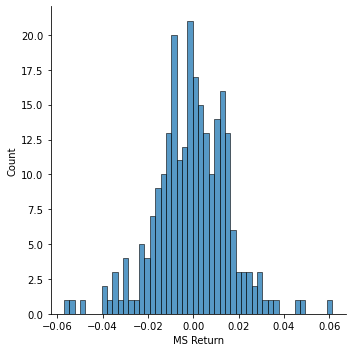

In [45]:
# Distribution Plot of MorganStanley 2015 returns
sb.displot(data=returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=50)

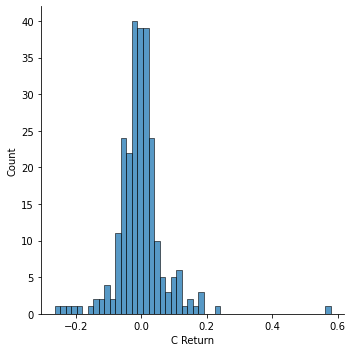

In [46]:
# Distribution Plot of CitiGroup 2008 returns
sb.displot(data=returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=50)

<AxesSubplot:xlabel='Date'>

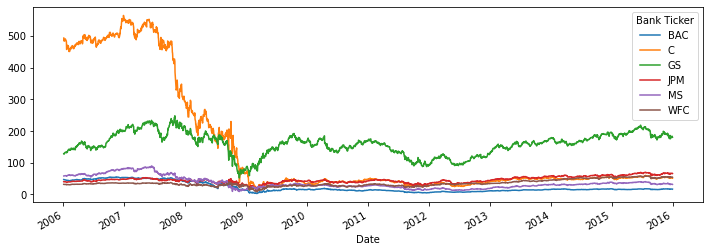

In [59]:
# Lineplot of all stock close prices
stocks.xs(level="Stock Info", key="Close", axis=1).plot(figsize=[12, 4])

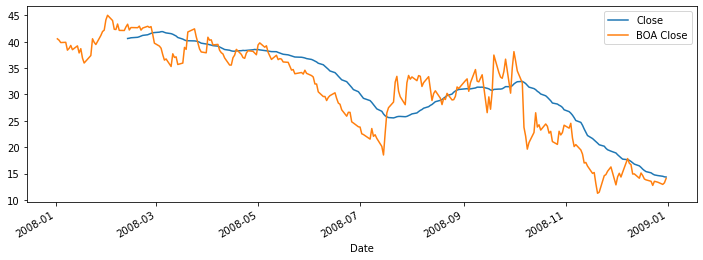

In [66]:
# Bank of America 30 day rolling average Close price
# Plotted with Close Prices over 2008
BOA['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(figsize=[12,4])
BOA['Close'].loc['2008-01-01':'2008-12-31'].plot(label="BOA Close", figsize=[12,4])
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

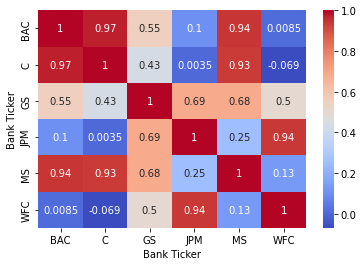

In [70]:
# Heatmap of stock correlation
sb.heatmap(stocks.xs(level="Stock Info", key="Close", axis=1).corr(), annot=True, cmap="coolwarm")

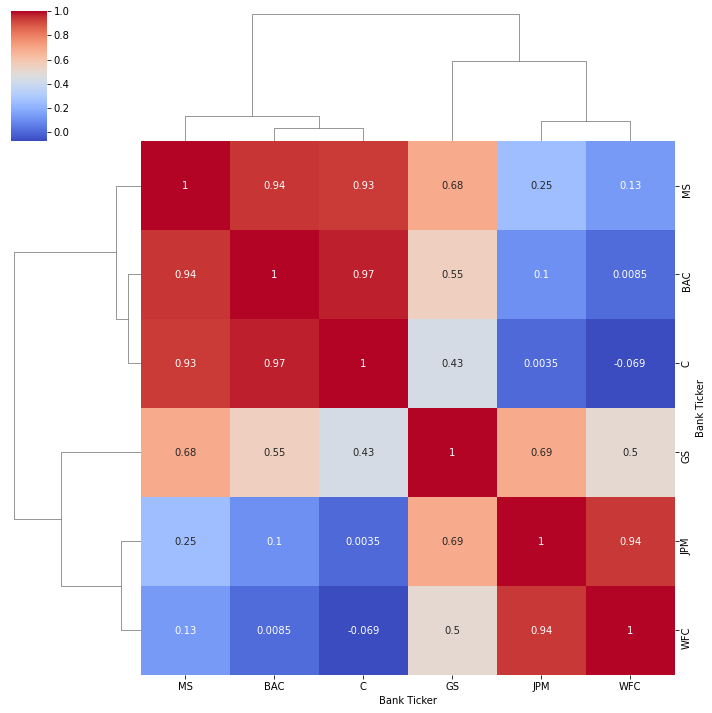

In [71]:
# Clustermap of stock correlation
sb.clustermap(data=stocks.xs(level="Stock Info", key="Close", axis=1).corr(), annot=True, cmap="coolwarm")

In [78]:
# Candle Plot of Bank of America 2015
BOA[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [79]:
# Moving Averages of MorganStanley over 2015
ms['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study="sma")

In [80]:
# Bollinger Band Plot for Bank of America 2015
BOA['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study="boll")